<a href="https://colab.research.google.com/github/yuuhyun/python_taehoon_itwill/blob/main/20250508_python22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요 패키지, 모듈 import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DataFrame Concat

In [ ]:
np.random.seed(42)
df1 = pd.DataFrame(data={
    'id': np.arange(1, 6),
    'korean': np.random.randint(101, size = 5), # [0,101) 범위의 정수 난수 5개로 이루어진 배열
    'english': np.random.randint(101, size = 5)
})

df1

,id,korean,english
0,1,51,20
1,2,92,82
2,3,14,86
3,4,71,74
4,5,60,74


In [ ]:
df2 = pd.DataFrame(data={
    'id': np.arange(6, 11),
    'korean': np.random.randint(101, size = 5), # [0,101) 범위의 정수 난수 5개로 이루어진 배열
    'english': np.random.randint(101, size = 5)
})

df2

,id,korean,english
0,6,38,13
1,7,17,8
2,8,3,89
3,9,88,52
4,10,59,1


In [ ]:
df = pd.concat([df1, df2])

df

,id,korean,english
0,6,51,20
1,7,92,82
2,8,14,86
3,9,71,74
4,10,60,74
0,6,38,13
1,7,17,8
2,8,3,89
3,9,88,52
4,10,59,1


In [ ]:
df = pd.concat([df1, df2], ignore_index=True)

df

,id,korean,english
0,6,51,20
1,7,92,82
2,8,14,86
3,9,71,74
4,10,60,74
5,6,38,13
6,7,17,8
7,8,3,89
8,9,88,52
9,10,59,1


# babynames 데이터셋

In [ ]:
col_names = ['name', 'gender', 'births']
file_path = 'https://raw.githubusercontent.com/wesm/pydata-book/refs/heads/3rd-edition/datasets/babynames/yob1880.txt'
yob1880 = pd.read_csv(file_path, names = col_names)
yob1880['year'] = 1880 # 데이터프레임 yob1880에 컬럼 year을 추가.

In [ ]:
yob1880.head()

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [ ]:
yob1880.tail()

,name,gender,births,year
1995,Woodie,M,5,1880
1996,Worthy,M,5,1880
1997,Wright,M,5,1880
1998,York,M,5,1880
1999,Zachariah,M,5,1880


In [ ]:
col_names = ['name', 'gender', 'births']

for year in range(1880, 2011):
    file_path = f'https://raw.githubusercontent.com/wesm/pydata-book/refs/heads/3rd-edition/datasets/babynames/yob{year}.txt'
    df = pd.read_csv(file_path, names = col_names)
    df['year'] = year
    yob1880 = pd.concat([yob1880, df], ignore_index=True)

yob1880.tail()

,name,gender,births,year
1692779,Zymaire,M,5,2010
1692780,Zyonne,M,5,2010
1692781,Zyquarius,M,5,2010
1692782,Zyran,M,5,2010
1692783,Zzyzx,M,5,2010


In [ ]:
# 강사님 code

col_names = ['name', 'gender', 'births']
yobs = []
for year in range(1880, 2011):
    file_path = f'https://raw.githubusercontent.com/wesm/pydata-book/refs/heads/3rd-edition/datasets/babynames/yob{year}.txt'

    # github에 저장된 CSV파일을 읽어서 데이터프레임을 생성
    yob_year = pd.read_csv(file_path, names = col_names)

    # 생성된 데이터프레임에 year 컬럼을 추가
    yob_year['year'] = year

    # 리스트에 데이터프레임을 추가
    yobs.append(yob_year)

In [ ]:
# 리스트 원소 개수
len(yobs)

131

In [ ]:
print(type(yobs[-1]))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
yobs[0].head()

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [ ]:
yobs[0].tail()

,name,gender,births,year
1995,Woodie,M,5,1880
1996,Worthy,M,5,1880
1997,Wright,M,5,1880
1998,York,M,5,1880
1999,Zachariah,M,5,1880


데이터프레임들의 리스트를 하나의 데이터프레임으로 합침(concat)

In [ ]:
yob_df = pd.concat(yobs, ignore_index = True)

In [ ]:
yob_df.head()

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [ ]:
yob_df.tail()

,name,gender,births,year
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010
1690783,Zzyzx,M,5,2010


In [ ]:
yob_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   name    1690784 non-null  object
 1   gender  1690784 non-null  object
 2   births  1690784 non-null  int64 
 3   year    1690784 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


## 연도별 신생아 수

In [ ]:
births_by_year = yob_df.groupby(by = 'year').births.sum()
births_by_year

,births
year,
1880,201486
1881,192703
1882,221538
1883,216954
1884,243466
...,...
2006,3946702
2007,3986130
2008,3915955


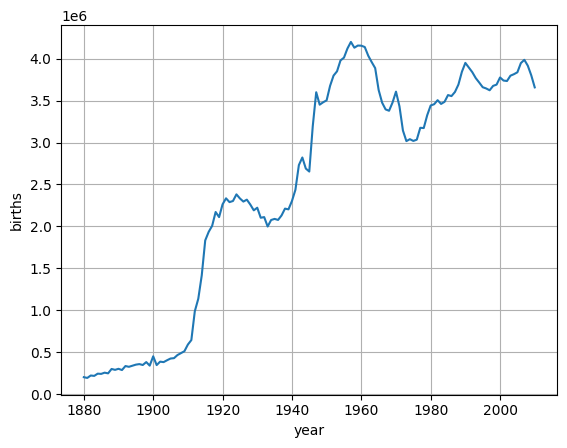

In [ ]:
sns.lineplot(x=births_by_year.index, y= births_by_year)
plt.grid()
plt.show()

`groupby()` 함수를 호출할 때 그룹을 설정하는 변수(컬럼 이름)를 인덱스가 아닌 컬럼으로 만들기.

In [ ]:
yob_df.groupby(by=['year'], as_index=False).births.sum()

,year,births
0,1880,201486
1,1881,192703
2,1882,221538
3,1883,216954
4,1884,243466
...,...,...
126,2006,3946702
127,2007,3986130
128,2008,3915955
129,2009,3801002


시리즈(Series) 또는 데이터프레임(DataFrame)의 인덱스(형 레이블)를 컬럼으로 변환.

In [ ]:
births_by_year.reset_index()

,year,births
0,1880,201486
1,1881,192703
2,1882,221538
3,1883,216954
4,1884,243466
...,...,...
126,2006,3946702
127,2007,3986130
128,2008,3915955
129,2009,3801002


## 연도별 성별 신생아 수

In [ ]:
births_by_year_gender = yob_df.groupby(by = ['year', 'gender']).births.sum()
births_by_year_gender

year  gender
1880  F           90993
      M          110493
1881  F           91955
      M          100748
1882  F          107851
                 ...   
2008  M         2032310
2009  F         1827643
      M         1973359
2010  F         1759010
      M         1898382
Name: births, Length: 262, dtype: int64

In [ ]:
births_by_year_gender.index

MultiIndex([(1880, 'F'),
            (1880, 'M'),
            (1881, 'F'),
            (1881, 'M'),
            (1882, 'F'),
            (1882, 'M'),
            (1883, 'F'),
            (1883, 'M'),
            (1884, 'F'),
            (1884, 'M'),
            ...
            (2006, 'F'),
            (2006, 'M'),
            (2007, 'F'),
            (2007, 'M'),
            (2008, 'F'),
            (2008, 'M'),
            (2009, 'F'),
            (2009, 'M'),
            (2010, 'F'),
            (2010, 'M')],
           names=['year', 'gender'], length=262)

In [ ]:
yob_df.groupby(by=['year', 'gender'], as_index=False).births.sum()

,year,gender,births
0,1880,F,90993
1,1880,M,110493
2,1881,F,91955
3,1881,M,100748
4,1882,F,107851
...,...,...,...
257,2008,M,2032310
258,2009,F,1827643
259,2009,M,1973359
260,2010,F,1759010


In [ ]:
births_df = births_by_year_gender.reset_index()
#> reset_index()에서 아규먼트를 전달하지 않으면 모든 다중 인덱스(MultiIndex)들을 컬럼으로 변환.
births_df

,year,gender,births
0,1880,F,90993
1,1880,M,110493
2,1881,F,91955
3,1881,M,100748
4,1882,F,107851
...,...,...,...
257,2008,M,2032310
258,2009,F,1827643
259,2009,M,1973359
260,2010,F,1759010


In [ ]:
births_by_year_gender.reset_index(level=1)
#> 다중 인덱스들 중에서 level이 1인 인덱스만 컬럼으로 변환.

,gender,births
year,,
1880,F,90993
1880,M,110493
1881,F,91955
1881,M,100748
1882,F,107851
...,...,...
2008,M,2032310
2009,F,1827643
2009,M,1973359


In [ ]:
births_by_year_gender.reset_index(level='gender')
#> reset_index() 함수의 level 파라미터
#> (1) level 숫자값(인덱스): 0부터 시작하는 정수
#> (2) 인덱스 이름

,gender,births
year,,
1880,F,90993
1880,M,110493
1881,F,91955
1881,M,100748
1882,F,107851
...,...,...
2008,M,2032310
2009,F,1827643
2009,M,1973359


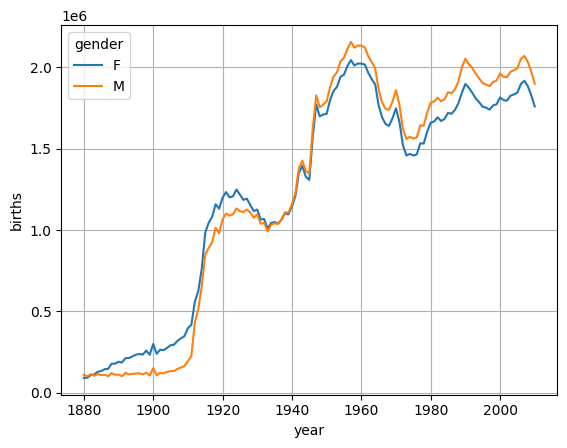

In [ ]:
sns.lineplot(data=births_df, x = 'year', y = 'births', hue = 'gender')
plt.grid()
plt.show()